In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Covid_19_data.csv')
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [39]:
df.describe(include='all')

,Date,State,Region,Confirmed,Deaths,Recovered,Death_cutz
count,321,321,321,321.000000,321.000000,321.000000,321
unique,NaN,137,187,NaN,NaN,NaN,9
top,NaN,Diamond Princess cruise ship,US,NaN,NaN,NaN,"(-0.001, 1.0]"
freq,NaN,183,58,NaN,NaN,NaN,78
mean,2020-04-29 00:00:00,NaN,NaN,9949.800623,709.152648,3030.277259,NaN
min,2020-04-29 00:00:00,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,2020-04-29 00:00:00,NaN,NaN,104.000000,2.000000,2.000000,NaN
50%,2020-04-29 00:00:00,NaN,NaN,653.000000,12.000000,73.000000,NaN
75%,2020-04-29 00:00:00,NaN,NaN,4655.000000,144.000000,587.000000,NaN
max,2020-04-29 00:00:00,NaN,NaN,299691.000000,27682.000000,132929.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [5]:
df.dtypes

Date         object
State        object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace=True)
df.dtypes

Date         datetime64[ns]
State                object
Region               object
Confirmed             int64
Deaths                int64
Recovered             int64
dtype: object

In [7]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
Date,,,,,,
2020-04-29,2020-04-29,NaN,Afghanistan,1939,60,252
2020-04-29,2020-04-29,NaN,Albania,766,30,455
2020-04-29,2020-04-29,NaN,Algeria,3848,444,1702
2020-04-29,2020-04-29,NaN,Andorra,743,42,423
2020-04-29,2020-04-29,NaN,Angola,27,2,7


In [14]:
df['State'].fillna(df['State'].mode()[0],inplace=True)
df.head()

/tmp/ipykernel_2726125/3312259283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna(df['State'].mode()[0],inplace=True)


,Date,State,Region,Confirmed,Deaths,Recovered
Date,,,,,,
2020-04-29,2020-04-29,Diamond Princess cruise ship,Afghanistan,1939,60,252
2020-04-29,2020-04-29,Diamond Princess cruise ship,Albania,766,30,455
2020-04-29,2020-04-29,Diamond Princess cruise ship,Algeria,3848,444,1702
2020-04-29,2020-04-29,Diamond Princess cruise ship,Andorra,743,42,423
2020-04-29,2020-04-29,Diamond Princess cruise ship,Angola,27,2,7


In [41]:
df['Death_cutz']=pd.qcut(df['Deaths'],q=10, duplicates='drop')
deaths=df.groupby(['Death_cutz', 'State'],observed=True).size().reset_index(name='count')
deaths.describe(include='all')

,Death_cutz,State,count
count,146,146,146.000000
unique,9,137,NaN
top,"(-0.001, 1.0]",Diamond Princess cruise ship,NaN
freq,36,9,NaN
mean,NaN,NaN,2.198630
std,NaN,NaN,5.137583
min,NaN,NaN,1.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000


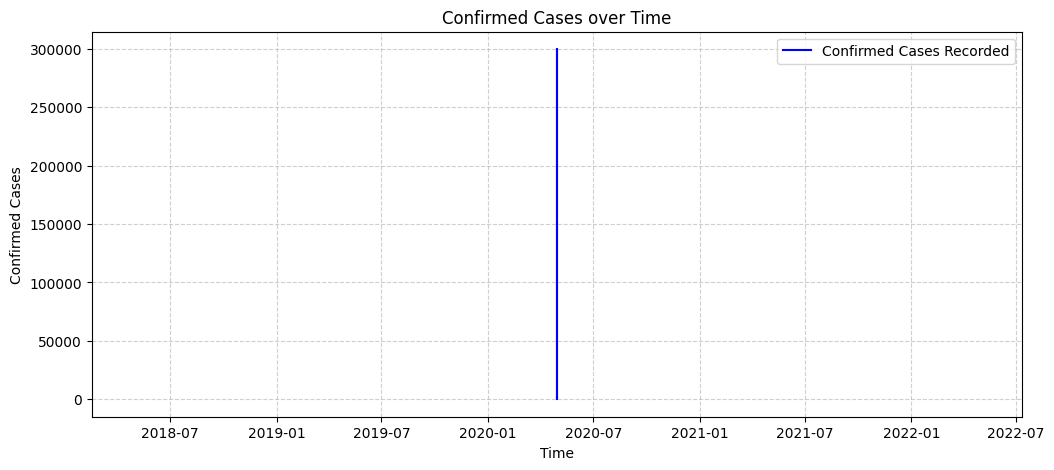

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Confirmed'], color='blue', label='Confirmed Cases Recorded')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability
plt.show()